n_features = 1850 and target_names = ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair'] and n_classes is = 7


C:\Users\Nahid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Nahid\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Nahid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Nahid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to sile

Cross_validation scores: [0.68907563 0.72268908 0.72321429]
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Train set score of NN: 1.00
Test set score of NN: 0.80
------------------------------------------------
Train set score of SVM: 1.00
Test set score of SVM: 0.81
------------------------------------------------
------------------------------------------------
Train set accuracy for gamma = 0.0001 and C = 1000.0 is : 1.0
Test set accuracy for gamma = 0.0001 and C = 1000.0 is : 0.6818181818181818
------------------------------------------------
Train set accuracy for gamma = 0.0005 and C = 1000.0 is : 1.0
Test set accuracy for gamma = 0.0005 and C = 1000.0 is : 0.6704545454545454
------------------------------------------------
Train set accuracy for gamma = 0

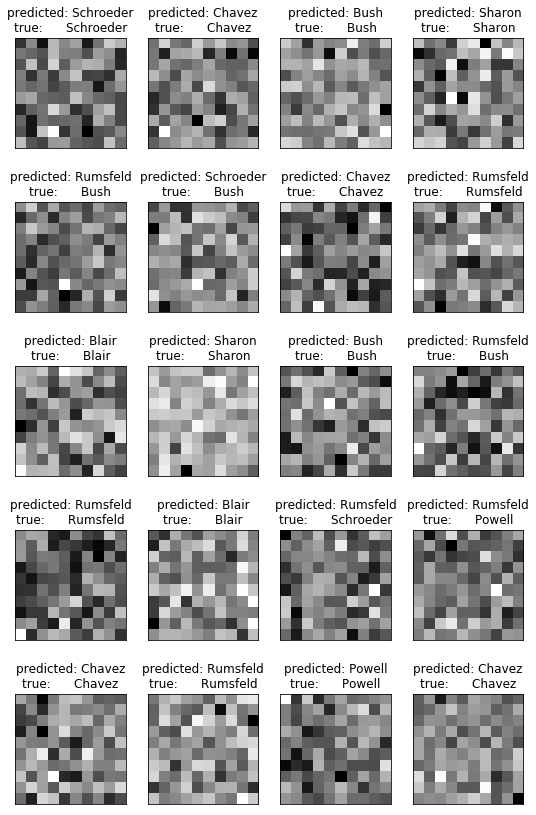

In [7]:

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#getting the lfw dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

#getting 50 sample from each class
mask = np.zeros(lfw_people.target.shape, dtype=np.bool)
for target in np.unique(lfw_people.target): mask[np.where(lfw_people.target == target)[0][:50]] = 1

#getting the x(data) and y(target) from the dataset
X_people = lfw_people.data[mask]
y_people = lfw_people.target[mask]

#making the value of x to be in range of 0 and 1
X_people = X_people / 255.

n_features = X_people.shape[1]
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("n_features = {} and target_names = {} and n_classes is = {}".format(n_features,target_names,n_classes))

#splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split( 
    X_people, y_people, stratify=y_people, test_size=0.25, random_state=42)



#preprocessing data with MinMaxScalar method
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#feature selection with SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)


#using PCA for feature extraction and dimesionality reduction
pca = PCA(n_components=100, whiten=True, svd_solver='randomized', random_state=0).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Neural Network classification algorithm
mlp = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=(200,100), alpha = 0.01 , activation='tanh')
mlp.fit(X_train_pca, y_train)

#SVM classification algorithm
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svm = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
svm = svm.fit(X_train_pca, y_train)

#cross validation
scores = cross_val_score(svm, X_people, y_people)
print("Cross_validation scores: {}".format(scores));

#getting the result
print("Best estimator found by grid search:")
print(svm.best_estimator_)
print("Train set score of NN: {:.2f}".format(mlp.score(X_train_pca, y_train)))
print("Test set score of NN: {:.2f}".format(mlp.score(X_test_pca, y_test)))
print("------------------------------------------------")
print("Train set score of SVM: {:.2f}".format(svm.score(X_train_pca, y_train)))
print("Test set score of SVM: {:.2f}".format(svm.score(X_test_pca, y_test)))
print("------------------------------------------------")
print("------------------------------------------------")

training_accuracy = []
test_accuracy = []
rang = range(1, 26)

#printing the result of SVM with different value of C and gamma
for C in (1e3, 5e3, 1e4, 5e4, 1e5):
    for gamma in (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1):
        model = SVC(kernel='rbf', gamma=gamma, C=C)
        model.fit(X_train_pca, y_train)
        
        print("Train set accuracy for gamma = {} and C = {} is : {}".format(gamma, C, model.score(X_train_pca, y_train)))
        print("Test set accuracy for gamma = {} and C = {} is : {}".format(gamma, C, model.score(X_test_pca, y_test)))
        print("------------------------------------------------")


def plot_gallery(images, titles, h, w, n_row=5, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


y_pred = svm.predict(X_test_pca)
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


plot_gallery(X_test_pca, prediction_titles, 10, 10)
plt.show()